In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [18]:
cars = pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


Description of columns
- MPG:Milege of the car (Mile per Gallon)
- HP:HOrse Power of the car(X1 column)
- VOL:Volume of the car (size)(X2 column)
- SP:TOP speed of the car (Miles per Hour)(X3 column)
- WT:Weight of the car (pounds)(X4 column)

In [19]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [20]:
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

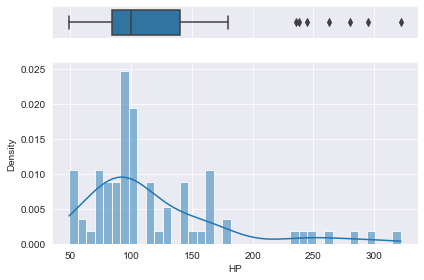

In [21]:
fig, (ax_box,ax_hist) = plt.subplots(2,sharex=True,gridspec_kw={"height_ratios": (.15,.85)})
sns.boxplot(data=cars,x='HP',ax=ax_box,orient='h')
ax_box.set(xlabel=' ')
sns.histplot(data=cars,x='HP',ax=ax_hist,bins=39,kde=True,stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

In [22]:
cars[cars.duplicated()]

,HP,MPG,VOL,SP,WT


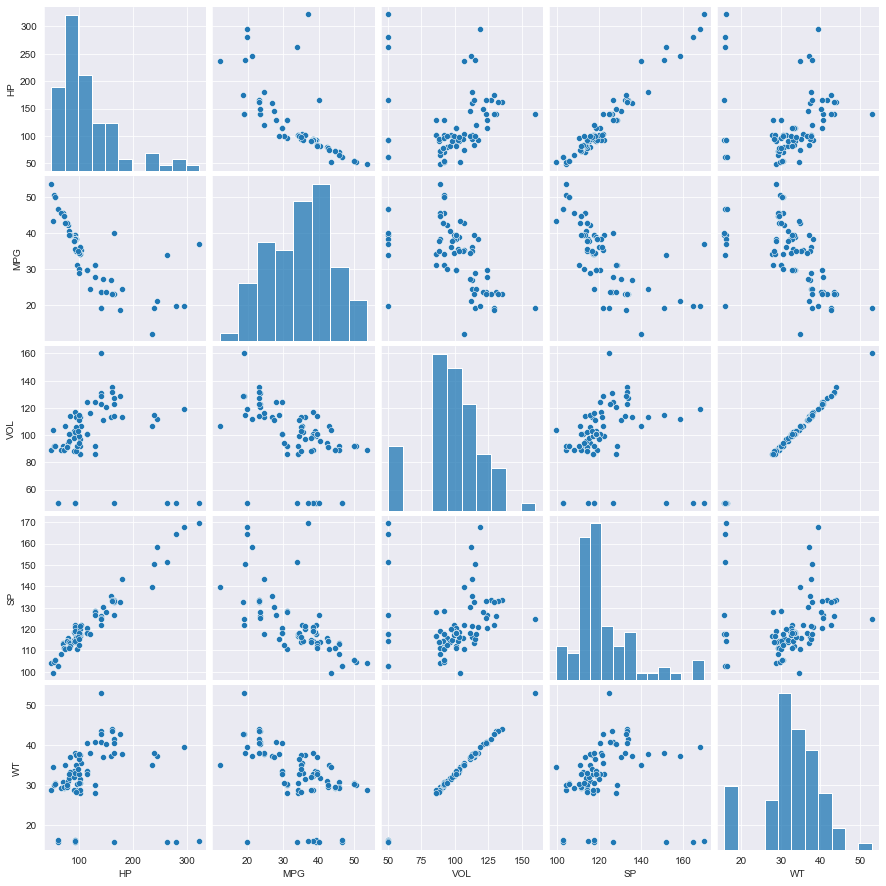

In [23]:
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [24]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


### Observstion
- The height correlation is between vol and sp is 0.999203

In [25]:
mode11 = smf.ols('MPG~WT+SP+HP',data=cars).fit()

In [26]:
mode11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     85.68
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           1.81e-24
Time:                        10:26:13   Log-Likelihood:                -234.15
No. Observations:                  81   AIC:                             476.3
Df Residuals:                      77   BIC:                             485.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.7848     14.490      1.986      0.051      -0.069      57.639
WT            -0.5994      0.067     -8.895      0.000      -0.734      -0.465
SP             0.4078      0.156      2.609      0.011       0.097       0.719
HP            -0.2085      0.039     -5.386      0.000      -0.286      -0.131
==============================================================================
Omnibus:                       10.924   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.048
Skew:                           0.705   Prob(JB):                      0.00242
Kurtosis:                       4.257   Cond. No.                     5.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Observations from model summary
- The R-squred and adjust R-Squred values are good and about 75% of varaiability in Y by X columns
- The probability value with respect to F-statics is close to zero,includind that all or some of X columns are significant
- The p-values for VOl and WT are higher than 5% indicating some interaction issue among themselves, which need to be further exploerd 

In [27]:
d1=pd.DataFrame()
d1["actual_y1"]=cars["MPG"]
d1.head()

,actual_y1
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [30]:
pred_y1 = model.predict(cars.iloc[:,0:4])
df1["pred_y1"] = pred_y1
df1.head()

NameError: name 'model' is not defined